In [6]:
# 必要なモジュールのインポート
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from matplotlib import pyplot as plt

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


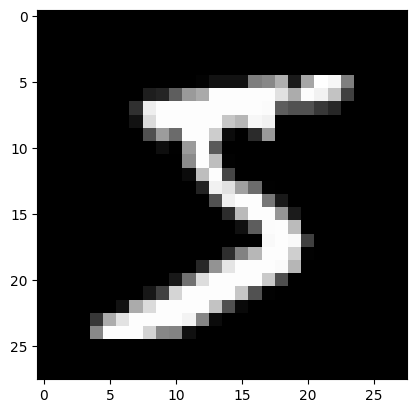

5


In [7]:
# MINISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

# 4次元テンソル形式に変換
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape, x_test.shape)

# 画像の確認
plt.imshow(x_train[0], cmap="gray")
plt.show()

# ラベルの確認
print(y_train[0])

In [8]:
# データの正規化および実数値化
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# ラベルデータをOne-hotベクトルに変換
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train.shape)

(60000, 10)


In [9]:
# バッチサイズ、エポック数の設定
batch_size = 128
epochs = 20

In [10]:
# CNNモデルの定義
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# CNNモデルの可視化
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)             

In [11]:
# CNNモデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# CNNモデルの学習
history = model.ﬁt(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 177s 373ms/step - loss: 0.2046 - accuracy: 0.9360 - val_loss: 0.0455 - val_accuracy: 0.9861
Epoch 2/20
469/469 [==============================] - 181s 386ms/step - loss: 0.0662 - accuracy: 0.9797 - val_loss: 0.0322 - val_accuracy: 0.9891
Epoch 3/20
469/469 [==============================] - 168s 358ms/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0300 - val_accuracy: 0.9903
Epoch 4/20
469/469 [==============================] - 170s 362ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0279 - val_accuracy: 0.9903
Epoch 5/20
469/469 [==============================] - 179s 382ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0232 - val_accuracy: 0.9923
Epoch 6/20
469/469 [==============================] - 164s 350ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0220 - val_accuracy: 0.9932
Epoch 7/20
469/469 [==============================] - 171s 364ms/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.0237 -

Test loss: 0.02410370297729969
Test accuracy: 0.9929999709129333


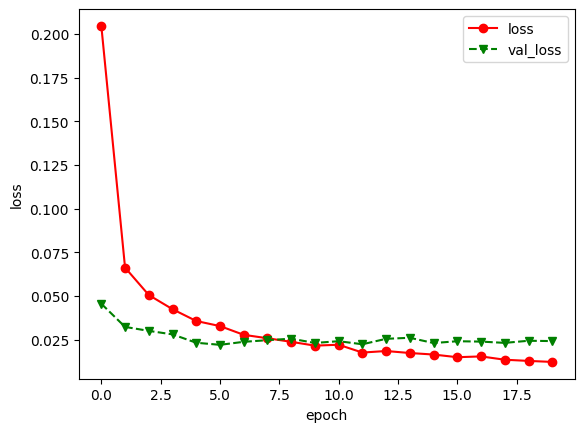

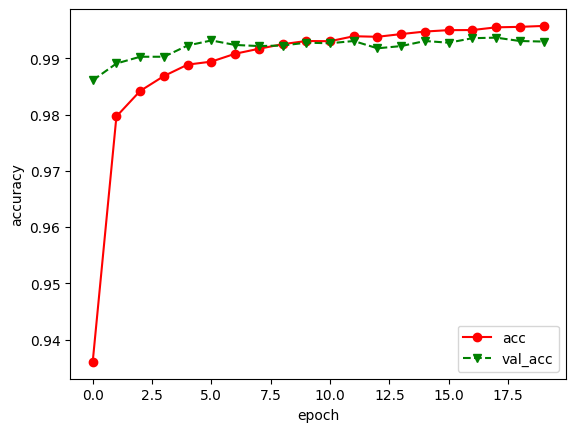

In [13]:
# CNNモデルの予測精度
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# 予測誤差のグラフ化
plt.plot(range(len(history.history['loss'])),
         history.history['loss'],
         marker='o', color = 'red', label='loss')
plt.plot(range(len(history.history['val_loss'])),
         history.history['val_loss'],
         marker='v', linestyle='--', color='green', label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

# 予測精度のグラフ化
plt.plot(range(len(history.history['accuracy'])),
         history.history['accuracy'],
         marker='o', color = 'red', label='acc')
plt.plot(range(len(history.history['val_accuracy'])),
         history.history['val_accuracy'],
         marker='v', linestyle='--', color = 'green', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()